<a href="https://colab.research.google.com/github/jae-gyeong/marchine_learning_start/blob/master/2019_09_26%EC%84%A0%ED%98%95%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 학습 내용
# 샘플의 특성이 104개인 것을 활용하여 릿지 회귀, 라쏘 회귀에 대해 알아본다.
# 릿지 회귀(Ridge Regression) - L2에 대해 실습을 통해 알아본다.
# 라쏘 회귀(Lasso Regression) - L1에 대해 실습을 통해 알아본다.
# 릿지 회귀(Ridge Regression)의 alpha의 변경
# 라쏘 회귀(Lasso Regression)의 alpha의 변경
# 모델에 제한을 두기(규제)
# (1) 릿지 회귀 - 모델에서의 계수를 0에 가깝게 만든다.
# (2) 라쏘 회귀 - 실제로 계수를 0으로 만든다.

In [0]:
# (1) 릿지 회귀(Ridge) - L2
# 릿지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위한 하나와 추가 제약 조건을 만족시키기 위
# 한 목적
# 가중치의 절대값을 가능한 작게 만든다. w(기울기)의 모든 값이 0에 가깝게 되길 원한다. (규제) -
# Regularization
# 모든 특성이 출력에 주는 영향을 작게 만든다.
# 규제(Regularization)을 하는 이유 - 과대적합(Overfitting)이 되지 않도록 모델을 강제로 제한한다.
# 릿지 회귀의 규제 방식은 L2규제라고하기도 한다.
# 릿지 회귀는 linear_model.Ridge에 구현되어 있음.

In [0]:
! pip install mglearn

     |████████████████████████████████| 542kB 4.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=e147f72db2047cdc2632c60d4c66cac1ac7bbc9104a2111ce9672c4641e6c553
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures # 변수확장
from sklearn.linear_model import Ridge # 릿지회귀
import pandas as pd

In [0]:
### 데이터 셋 준비
boston = load_boston() # 데이터 셋 불러오기
print(type(boston.target), type(boston.data))
print(boston.target.shape, boston.data.shape)
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(506,) (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [0]:
df_boston.loc[:, 'CRIM':'LSTAT'] # 처음부터 끝까지 컬럼명 입력해서 넣어줌

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [0]:
df_boston.loc[:, 'CRIM':'LSTAT'].shape

(506, 13)

In [0]:
X = df_boston.loc[:, 'CRIM':'LSTAT'] # 입력 데이터
y = boston.target
print("정규화,확장 전 데이터 셋 : ", X.shape, y.shape)
normalize_X = MinMaxScaler().fit_transform(X) # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X) # 데이터 featur
print("정규화, 추가 생성 : ", ex_X.shape, y.shape)

정규화,확장 전 데이터 셋 :  (506, 13) (506,)
정규화, 추가 생성 :  (506, 104) (506,)


In [0]:
from sklearn.linear_model import LinearRegression

# **일반 선형 회귀 모델을 이용한 학습 및 평가**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 데이터 세트 점수 :{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 :{:.2f}".format(lr.score(X_test, y_test)))


훈련 데이터 세트 점수 :0.75
테스트 데이터 세트 점수 :0.68


In [0]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 데이터 세트 점수 :{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 :{:.2f}".format(lr.score(X_test, y_test)))


훈련 데이터 세트 점수 :0.94
테스트 데이터 세트 점수 :0.78


### **릿지(Ridge)회귀 적용 : alpha =1**

In [0]:
from sklearn.linear_model import Ridge


In [0]:
ridge = Ridge().fit(X_train , y_train)
print(ridge)
print("훈련 데이터 세트 점수 :{:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 데이터 세트 점수 :{:.2f}".format(ridge.score(X_test, y_test)))


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 데이터 세트 점수 :0.75
테스트 데이터 세트 점수 :0.68


# 확인 결과
 > - 선형회귀는 과대적합, Ridge는 규제로 인해 과대적합이 적어진다.
- alpha을 이용하여 훈련세트의 성능 대비 모델을 얼마나 단순화 시킬 수 있는지 지정 가능.(기본값 alpha=1.0)
alpha의 계수를 높이면 w의 계수를 0에 가깝게 만든다. 계수가 0에 가까워지면 일반화에 도움이 된다.(훈련
세트 성능이 나빠짐)
-   alpha의 게수를 줄이면 그만큼 풀리면서 LinearRegression 으로 모델과 점점 가까워짐

### **릿지(Ridge) 회귀 적용 : alpha = 0.1**

In [0]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10)
print("10훈련 데이터 세트 점수 :{:.2f}".format(ridge10.score(X_train, y_train)))
print("10테스트 데이터 세트 점수 :{:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01)
print("01훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("01테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
10훈련 데이터 세트 점수 :0.76
10테스트 데이터 세트 점수 :0.74
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
01훈련 세트 점수 : 0.92
01테스트 세트 점수 : 0.84


In [0]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y,test_size = 0.2, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 데이터 세트 점수 :{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 :{:.2f}".format(lr.score(X_test, y_test)))


훈련 데이터 세트 점수 :0.94
테스트 데이터 세트 점수 :0.81


## 릿지 회귀(Ridge)-alpha
A. 앞의 예제는 alpha를 10, 0.1, 0.01으로 이용

B. alpha는 모델을 얼마나 많이 규제할지 조절한다.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Ridge alpha=10')

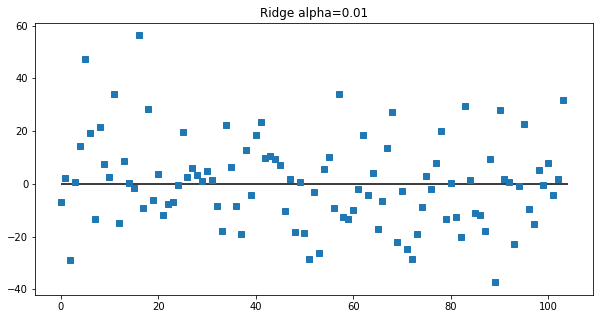

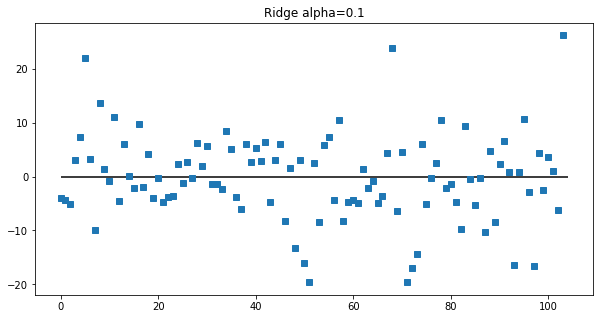

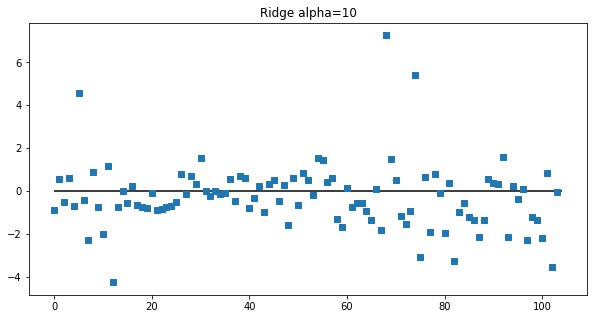

In [0]:
fig = plt.figure(figsize=(10,5))
plt.hlines(0,0, len(ridge001.coef_))                    # x는 인덱스 y는 값들의 위치
plt.plot(ridge001.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

fig = plt.figure(figsize=(10,5))
plt.hlines(0,0, len(ridge01.coef_))                    # x는 인덱스 y는 값들의 위치
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.1')

fig = plt.figure(figsize=(10,5))
plt.hlines(0,0, len(ridge10.coef_))                    # x는 인덱스 y는 값들의 위치
plt.plot(ridge10.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=10')

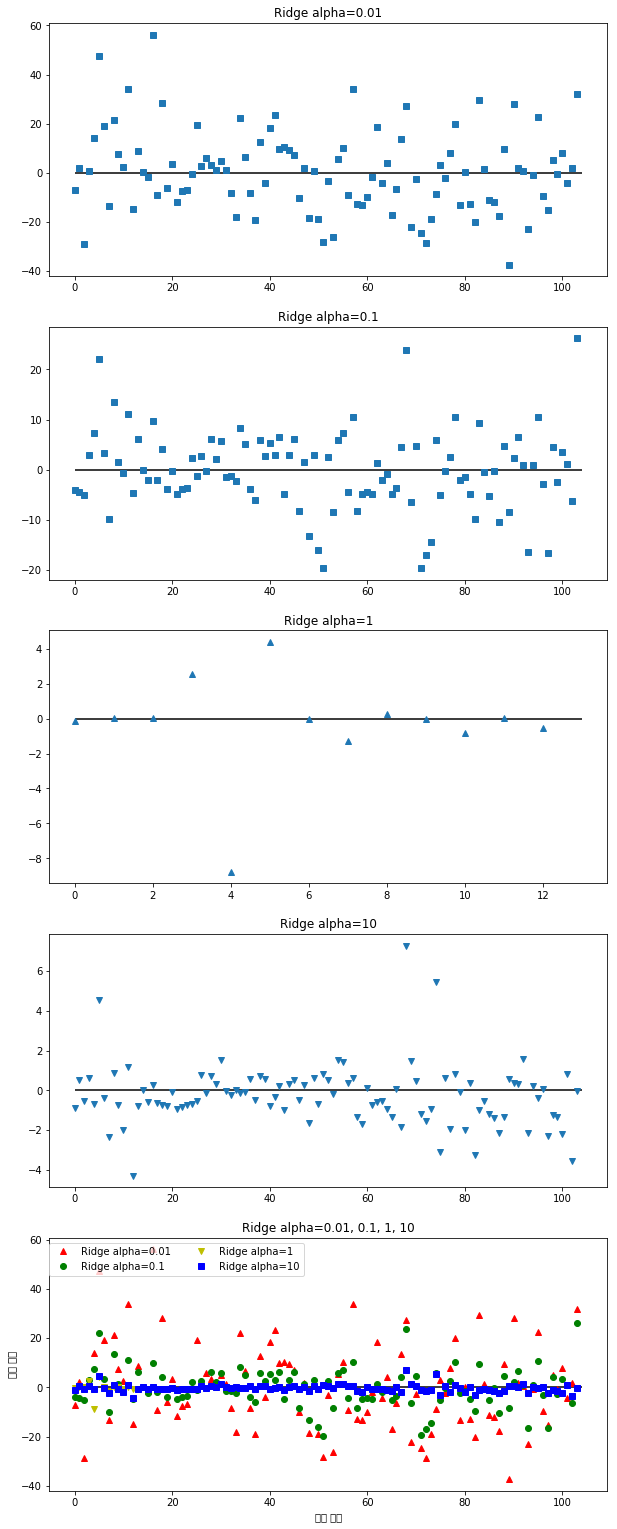

In [0]:
fig = plt.figure(figsize=(10,27))
#ax1 = fig.add_subplot(5, 1, 1)
#ax2 = fig.add_subplot(5, 1, 2)
#ax3 = fig.add_subplot(5, 1, 3)
#ax4 = fig.add_subplot(5, 1, 4)
#ax5 = fig.add_subplot(5, 1, 5)

plt.subplot(5, 1, 1)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

plt.subplot(5, 1, 2)
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")
plt.title('Ridge alpha=0.1')

plt.subplot(5, 1, 3)
plt.hlines(0,0, len(ridge.coef_))
plt.plot(ridge.coef_, '^', label="Ridge alpha=1")
plt.title('Ridge alpha=1')

plt.subplot(5, 1, 4)
plt.hlines(0,0, len(ridge10.coef_))
plt.plot(ridge10.coef_, 'v', label="Ridge alpha=10")
plt.title('Ridge alpha=10')

plt.subplot(5, 1, 5)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 'r^', label="Ridge alpha=0.01")
plt.plot(ridge01.coef_, 'go', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 'yv', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'bs', label="Ridge alpha=10")
plt.title('Ridge alpha=0.01, 0.1, 1, 10')

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.legend(ncol=2, loc=(0,0.85))
plt.show()

## mglearn을 이용하여 훈련 데이터의 크기를 변화시키며 학습 곡선 확인해 보기

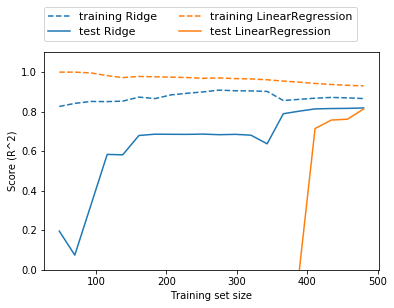

In [0]:
# alpha = 1
mglearn.plots.plot_ridge_n_samples()


모든 데이터 셋에서 TRAINING의 데이터 셋으로 모델 생성의 경우, 일반선형회귀의 r^2의 값이 높다.

단, 테스트 데이터 셋에서는 모델은 비교시에 릿지 회귀가 Score(r^2)의 값이 높다.

테스트 셋에 대한 경우, 데이터가 많아지면 선형회귀 모델이 릿지 모델에 Score가 거의 가까워진다.

충분한 데이터는 규제항이 덜 중요해져 릿지 회귀와 선형회귀는 같아진다.

## (2) 라쏘 회귀(Lasso) -릿지(Ridge)의 대안 (L1규제)

- 릿지 회귀에서와 같이 w(가중치-계수)의 모든 원소가 0에 가깝게 되길 원한다.(규제)

- 릿지 회귀와 달리 라쏘(Lasso)는 실제로 어떤 계수를 0으로 만든다.
- 완전히 제외되는 특성이 발생
라쏘 회귀의 규제 방식은 L1규제라고 하기도 한다.

In [0]:
from sklearn.linear_model import Lasso
import numpy as np

In [0]:
lasso = Lasso().fit(X_train, y_train)
print("훈련 데이터 세트 점수 :{:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 :{:.2f}".format(lasso.score(X_test, y_test)))

훈련 데이터 세트 점수 :0.25
테스트 데이터 세트 점수 :0.25


- 기본 라쏘 회귀의 score의 점수가 매우 낮다
(라는데 같이 나옴)

In [0]:
# 특성(feature)가 0이 아닌 것의 개수는?
print("사용한 특성의 수 :{:.2f}".format(np.sum(lasso.coef_ !=0)))

사용한 특성의 수 :4.00


- 사용한 특성의 수가 매우 작음(4개)

## **라쏘의 alpha을 활용하여 살펴보기**

In [0]:
lasso00001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)  # max_iter 반복
print("훈련 데이터 세트 점수 :{:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 데이터 세트 점수 :{:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 :{:.2f}".format(np.sum(lasso00001.coef_ !=0)))

훈련 데이터 세트 점수 :0.88
테스트 데이터 세트 점수 :0.82
사용한 특성의 수 :30.00


In [0]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso00001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso00001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))
print("*"*50)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))
print("*"*50)

lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso01.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso01.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso01.coef_ != 0))
print("*"*50)

lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso10.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso10.score(X_test, y_test))

훈련 데이터 세트 점수 :  0.9396766003277741
테스트 데이터 세트 점수 :  0.8179646979440761
사용한 특성의 수 :  93
**************************************************
훈련 데이터 세트 점수 :  0.878862505628769
테스트 데이터 세트 점수 :  0.8246018669708587
사용한 특성의 수 :  30
**************************************************
훈련 데이터 세트 점수 :  0.7469971327325291
테스트 데이터 세트 점수 :  0.6960152938224358
사용한 특성의 수 :  11
**************************************************
훈련 데이터 세트 점수 :  0.0
테스트 데이터 세트 점수 :  -0.023340500652033302


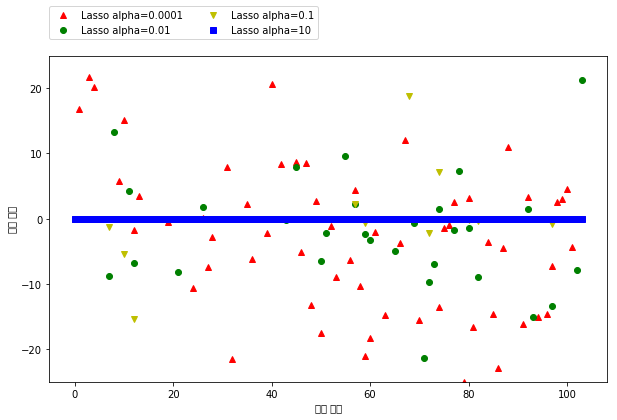

In [0]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(10,6))
plt.plot(lasso00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso10.coef_, "bs", label="Lasso alpha=10")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

alpha가 적어지면 적어질수록 규제를 받지 않는 모델이 된다.
실제의 경우는 보통 릿지 회귀를 선호함.
만약 특성이 많고 일부부만 중요하다면 Lasso가 좋은 선택